<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [1]:
### YOUR CODE STARTS HERE

In [2]:
# Start with importing the  libraries needed
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data into pandas dataframe
df= pd.read_csv(r'C:\Users\Administrator\Downloads\house-votes-84.data', header=None)

In [4]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [5]:
# Fix column names to match the issue voted on
df = df.rename(columns={0:'Class Name', 1:'handicapped-infants', 2:'water-project',
                  3:'budget', 4:'phys-fee-freeze', 5:'elsalvador-aid', 6:'religious-groups-in-schools',
                  7:'anti-satellite', 8:'nicaraguan-aid', 9:'mx-missile', 10:'immigration',
                 11:'synfuels', 12:'education', 13:'superfund', 14:'crime', 15:'duty-free-exp',
                  16:'export-adm-sa'})

In [6]:
# Check to ensure column names appear as desired
df.head()

,Class Name,handicapped-infants,water-project,budget,phys-fee-freeze,elsalvador-aid,religious-groups-in-schools,anti-satellite,nicaraguan-aid,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-exp,export-adm-sa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [7]:
df= df.replace({'n': 0, 'y': 1, '?': np.NaN})

In [8]:
# Separate the data into 2 distinct groups: democrats and republicans
dem= df[df['Class Name']== 'democrat']
rep= df[df['Class Name']== 'republican']

In [9]:
dem.head()

,Class Name,handicapped-infants,water-project,budget,phys-fee-freeze,elsalvador-aid,religious-groups-in-schools,anti-satellite,nicaraguan-aid,mx-missile,immigration,synfuels,education,superfund,crime,duty-free-exp,export-adm-sa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [10]:
# Define function for finding t-test results / values
def compareVotes(d1, d2, rpv):
    
    # Create a dictionary to hold key/ value pairs
    
    static_list_t_results= {}
    
    for issue in d1:
        
        # Begin by iterating through all features of the indicated dataframe
        # This will not work if the dataframes do not contain the same features.
        
        if issue!= 'Class Name':
            t_result= sps.ttest_ind(d1[issue], d2[issue], nan_policy='omit')
            
            # Ignore all values contained in the 'Class Name' feature.
            
            if t_result[1] < rpv:
                rej= True
                
            else:
                rej= False
            
            # If the pvalue is less than the required pvalue, The Null Hypothesis is Rejected.
            # Otherwise, it is Not Rejected
            
            d_mean= dem[issue].mean()
            r_mean= rep[issue].mean()
            
            if d_mean > r_mean:
                lean= 'Democrat'
                
            if r_mean > d_mean:
                lean= 'Republican'
                
            # This part of the code will check to see if the mean of democrat votes
            # is less than or greater than the mean of republican votes.
            # If the mean is higher, than more members of that party voted yes.
            # This does not factor how many of each party are present, nor
            # how much of the total vote was contributed by either party.
            
            static_list_t_results.update({issue:['Null Hypothesis Rejected:',rej, 'Primary support:', lean]})
            
            # Update the dictionary with the key issue: values= whether or not the null hyp was rejected
            # and which party supported the bill more.
            
    for key, values in static_list_t_results.items():
        print(key, values)
                        
    return
            

In [11]:
compareVotes(dem, rep, 0.01)

handicapped-infants ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
water-project ['Null Hypothesis Rejected:', False, 'Primary support:', 'Republican']
budget ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
phys-fee-freeze ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
elsalvador-aid ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
religious-groups-in-schools ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
anti-satellite ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
nicaraguan-aid ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
mx-missile ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
immigration ['Null Hypothesis Rejected:', False, 'Primary support:', 'Republican']
synfuels ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
education ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican'

### The Conclusion:
1. With a pvalue less than 1%, Democrats supported the following bills more than Republicans:
 - Handicapped Infants
 - Budget
 - anti-satellite
 - Nicaraguan-Aid
 - mx-missle
 - synfuels
 - duty-free-export
 - export-south-africa
 
 
2. With a pvalue less than 1%, Republicans supported the following bills more than Democrats:
 - phys-fee-freeze
 - elsalvador-aid
 - religious-groups-in-schools
 - education
 - superfund
 - crime

In [12]:
compareVotes(dem, rep, 0.1)

handicapped-infants ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
water-project ['Null Hypothesis Rejected:', False, 'Primary support:', 'Republican']
budget ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
phys-fee-freeze ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
elsalvador-aid ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
religious-groups-in-schools ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
anti-satellite ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
nicaraguan-aid ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
mx-missile ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
immigration ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']
synfuels ['Null Hypothesis Rejected:', True, 'Primary support:', 'Democrat']
education ['Null Hypothesis Rejected:', True, 'Primary support:', 'Republican']

### For pvalue > 10%:
The water-project bill

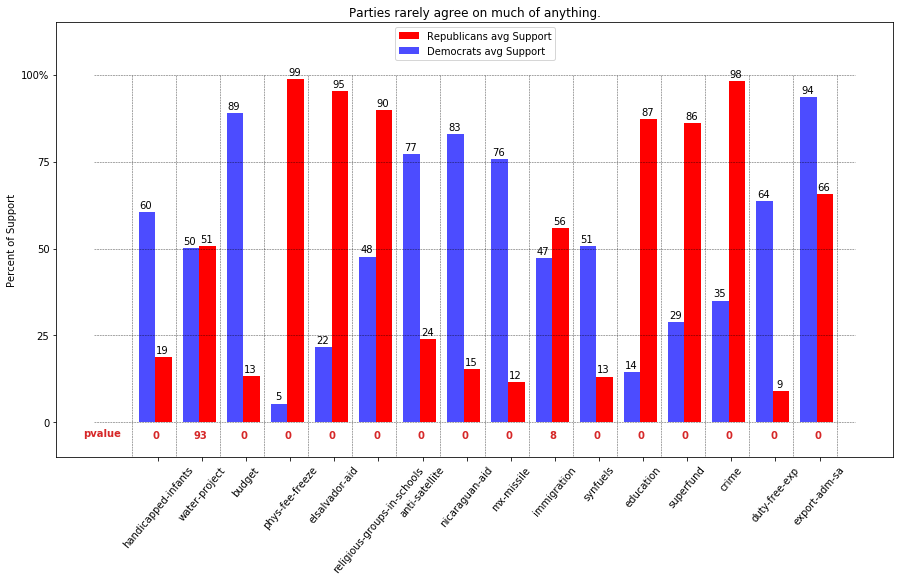

In [301]:
%matplotlib inline
def plot_data(d1, d2, rpv):
    
    ## Container lists for the data to be plotted.
    
    bills= []
    plot1= []
    plot2= []
    t_res_list= []
    
    # Iterate through all columns in the dataframes
    for issue in d1:
        
        #Ignore all values in column 'Class Name'
        if issue!= 'Class Name':
            
            # Put the name of the column into the bills list
            bills.append(issue)
            
            # Calculate the p-value, omitting nans
            # Put the p-value in in the ttest result list
            t_res= sps.ttest_ind(d1[issue], d2[issue], nan_policy='omit')
            t_res_list.append(t_res[1])
            
            # Calculate the average support for both parties
            # These will be the bars
            mean_1= d1[issue].mean()
            mean_2= d2[issue].mean()
            
            #Put the means into the lists
            plot1.append(mean_1)
            plot2.append(mean_2)
    
    # Begin plotting. Set figure and axes.
    fig, ax= plt.subplots(figsize=(15,8), facecolor='white')
    
    x= np.arange(0,(16*8),2)
    ypos1= x[1::4]
    ypos2=x[::4]
    width= 2.5
    
    # Plot bars and also plot a placeholder scatter for the p-values. This will enable me to annotate easily.
    p1= plt.bar(ypos2 + width, plot1, width=3, color='r',align='center', label='Republicans avg Support')
    p2= plt.bar(ypos1 - width, plot2, width=3, alpha=.7, color='b',
                align='center', label='Democrats avg Support')
    p3= plt.scatter(ypos1-.5, t_res_list, alpha=0)
    
    # Define functions to annotate each bar, as well as the p-values
    def t_annot(values):
        for value in values:
            
            height= value.get_height()
            ax.annotate('{:.0f}'.format(height*100),
                       xy= (value.get_x()+ value.get_width() /2, height),
                       xytext= (-1,2),
                       textcoords="offset points",
                       ha='center', va='bottom')
            
    def pval_annot(pvalues):
        for i, k in enumerate(pvalues):
            
            ax.annotate('{:.0f}'.format(k*100),
                        xy= ((i*8)+1.5, -.05),
                        xytext= (-2,0),
                        xycoords='data',
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='C3', fontweight='bold')
    
    # Define a function to drop gridlines on the graph.
    def linesX():
        for x in range(16+1):
            a1= x*8 - 3.25
            ax.vlines(a1, -.25, 1, linestyles='dashed', alpha=0.7, linewidth=0.5)
            
    def linesY():
        for y in range(4+1):
            y1= .25*y
            ax.hlines(y1, -10, 128, linestyles='dashed', alpha=0.7, linewidth=0.5)
            
            
    # Place functions to activate.        
    linesX()
    linesY()
    pval_annot(t_res_list)
    t_annot(p1)
    t_annot(p2)
    
    # Label and title the graph.
    ax.set_ylabel('Percent of Support')
    ax.set_title('Parties rarely agree on much of anything.')
    
    # Set ylim to pad the axes
    ax.set_ylim(-.1, 1.15)
    
    # Set xticks and labels
    plt.xticks(ypos1-.5, bills)
    ax.set_xticklabels(bills, rotation=50)
    
    # Set yticks
    plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0', '25', '50', '75', '100%'])
    
    # Draw Legend
    ax.legend(loc='upper center')
    ax.text(-12,-.04, s='pvalue', color='C3', fontweight='bold')
    
    plt.show();
    
                
    return

plot_data(rep, dem, 0.05)
